# Analysis of translational displacement of model aggregates with Vorticella.

In [17]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plots_folder = 'C:/Users/Deepak/Dropbox/ActiveMassTransport_Vorticella_SinkingAggregates/TranslationAnalysis/Plots'


folder = 'C:/Users/Deepak/Dropbox/ActiveMassTransport_Vorticella_SinkingAggregates/TranslationAnalysis'
analysis_file = 'TranslationAnalysis_combined.csv'
pixelpermm = 449

df = pd.read_csv(os.path.join(folder, analysis_file))
df['no:of vorticella'] = np.nan
df['object diameter (um)'] = 1000*df['object diameter (px)']/pixelpermm
# No:of vorticella mapping
df_num_vorticella = pd.read_csv(os.path.join(folder, 'Sphere_Vorticella_numbers.csv'))


for ii in range(len(df_num_vorticella)):
    
    track_id = df_num_vorticella['track ID'][ii]
    
    df['no:of vorticella'].loc[df['track ID'] == track_id] = int(df_num_vorticella['number of vorticella'][ii])
    
df

C:\Users\Deepak\Anaconda3\envs\gm_py3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,Unnamed: 0.1,track ID,track file,Time,sphere centroid X,sphere centroid Z,object bbox X,object bbox Z,object diameter (px),...,Xobj_image,Zobj_image,Xobj_true,Zobj_true,Velocity X,Velocity Z,Velocity X fluctuation,Velocity Z fluctuation,no:of vorticella,object diameter (um)
0,0,0,Sphere003,H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...,0.25,48.0,124.0,776,195,362,...,0.005848,0.007310,NaN,NaN,NaN,NaN,NaN,NaN,1.0,806.236080
1,1,1,Sphere003,H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...,0.53,47.0,123.0,775,196,362,...,0.000000,0.007310,NaN,NaN,NaN,NaN,NaN,NaN,1.0,806.236080
2,2,2,Sphere003,H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...,0.84,46.0,124.0,774,195,362,...,0.000000,0.007310,NaN,NaN,NaN,NaN,NaN,NaN,1.0,806.236080
3,3,3,Sphere003,H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...,1.12,45.0,123.0,773,196,362,...,0.000000,0.007310,NaN,NaN,NaN,NaN,NaN,NaN,1.0,806.236080
4,4,4,Sphere003,H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...,1.39,44.0,122.0,772,197,362,...,-0.005848,0.001462,NaN,NaN,NaN,NaN,NaN,NaN,1.0,806.236080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11647,1184,1184,Sphere016,H:/2019 Monterey Trip/Vorticella_GM/2019_08_22...,449.25,-99.0,-31.0,555,275,441,...,0.005848,-0.372807,NaN,NaN,NaN,NaN,NaN,NaN,4.0,982.182628
11648,1185,1185,Sphere016,H:/2019 Monterey Trip/Vorticella_GM/2019_08_22...,449.71,-100.0,-25.0,554,269,441,...,0.005848,-0.366959,NaN,NaN,NaN,NaN,NaN,NaN,4.0,982.182628
11649,1186,1186,Sphere016,H:/2019 Monterey Trip/Vorticella_GM/2019_08_22...,450.21,-101.0,-21.0,553,265,441,...,-0.005848,-0.361111,NaN,NaN,NaN,NaN,NaN,NaN,4.0,982.182628
11650,1187,1187,Sphere016,H:/2019 Monterey Trip/Vorticella_GM/2019_08_22...,450.61,-98.0,-17.0,556,261,441,...,0.005848,-0.349415,NaN,NaN,NaN,NaN,NaN,NaN,4.0,982.182628


In [29]:
# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
params = {
   'axes.labelsize': 14,
   'legend.fontsize': 10,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [5, 5]
   }
rcParams.update(params)
rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rcParams.update({'font.size': 16})
sns.set_style("ticks")

# Velocity statistics as a function of vorticella number

Initial exploration over all the data together. Later we will slice the data according to particle size and then compare effects of increasing vorticella. In general, the particle size WILL affect the strength of the velocity fluctuations. 

<IPython.core.display.Javascript object>


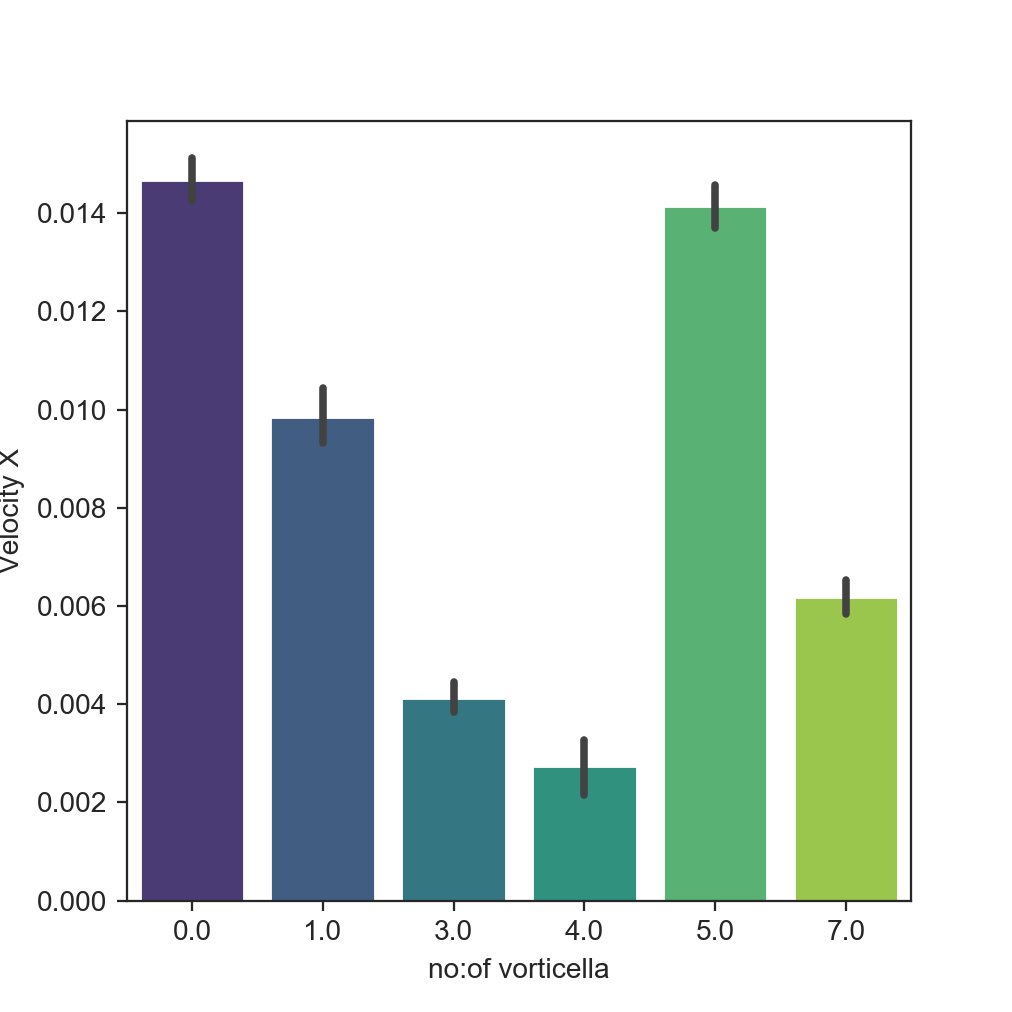

<IPython.core.display.Javascript object>


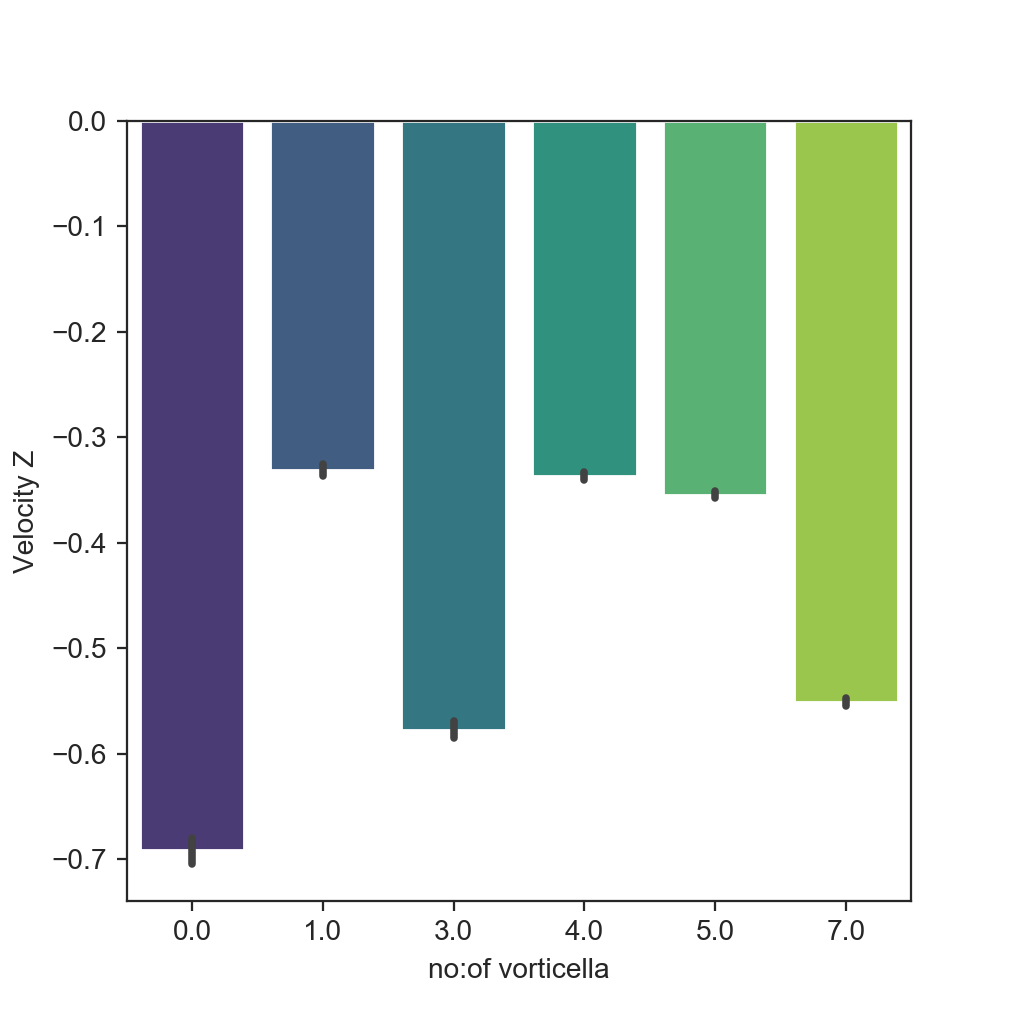

In [49]:
# Variations in the mean
plt.figure()
ax1 = sns.barplot(x="no:of vorticella", y="Velocity X", data=df, palette="viridis")

plt.figure()
ax1 = sns.barplot(x="no:of vorticella", y="Velocity Z", data=df, palette="viridis")

<IPython.core.display.Javascript object>


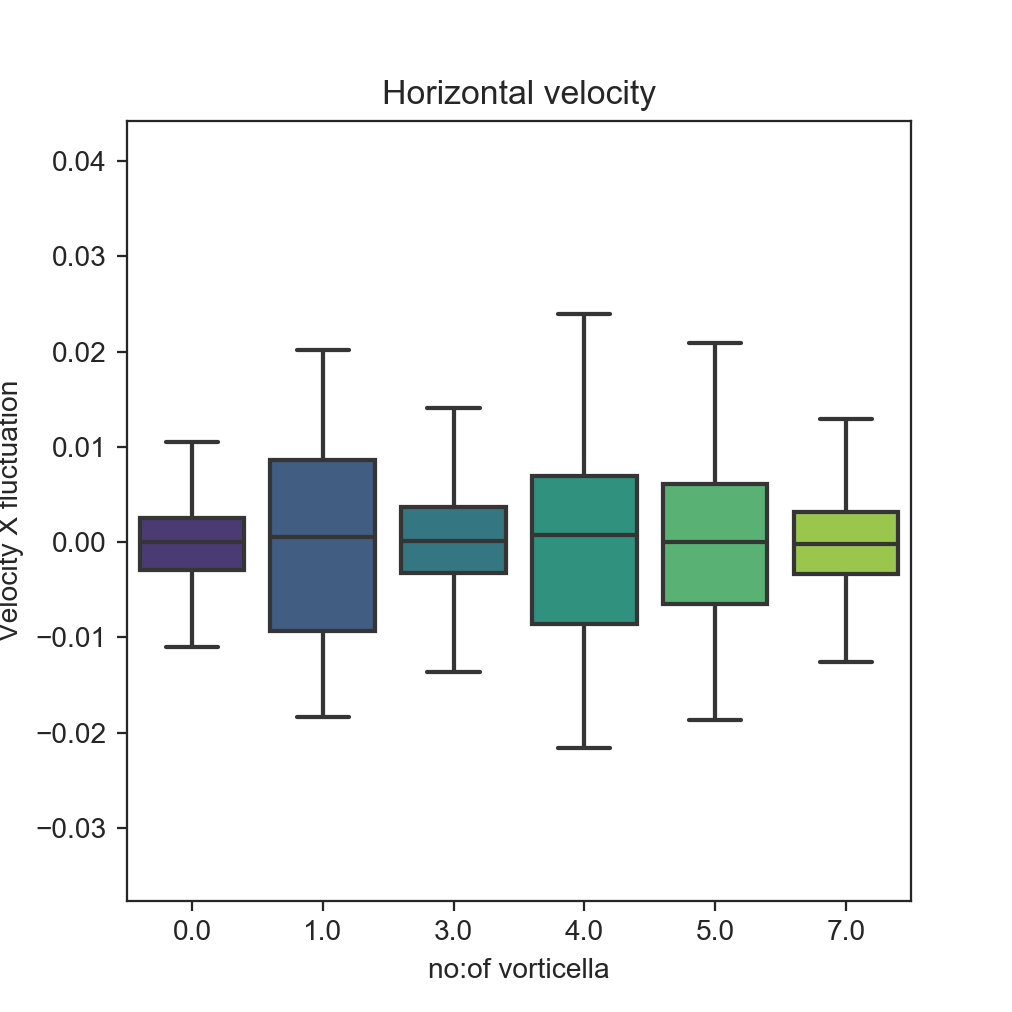

<IPython.core.display.Javascript object>


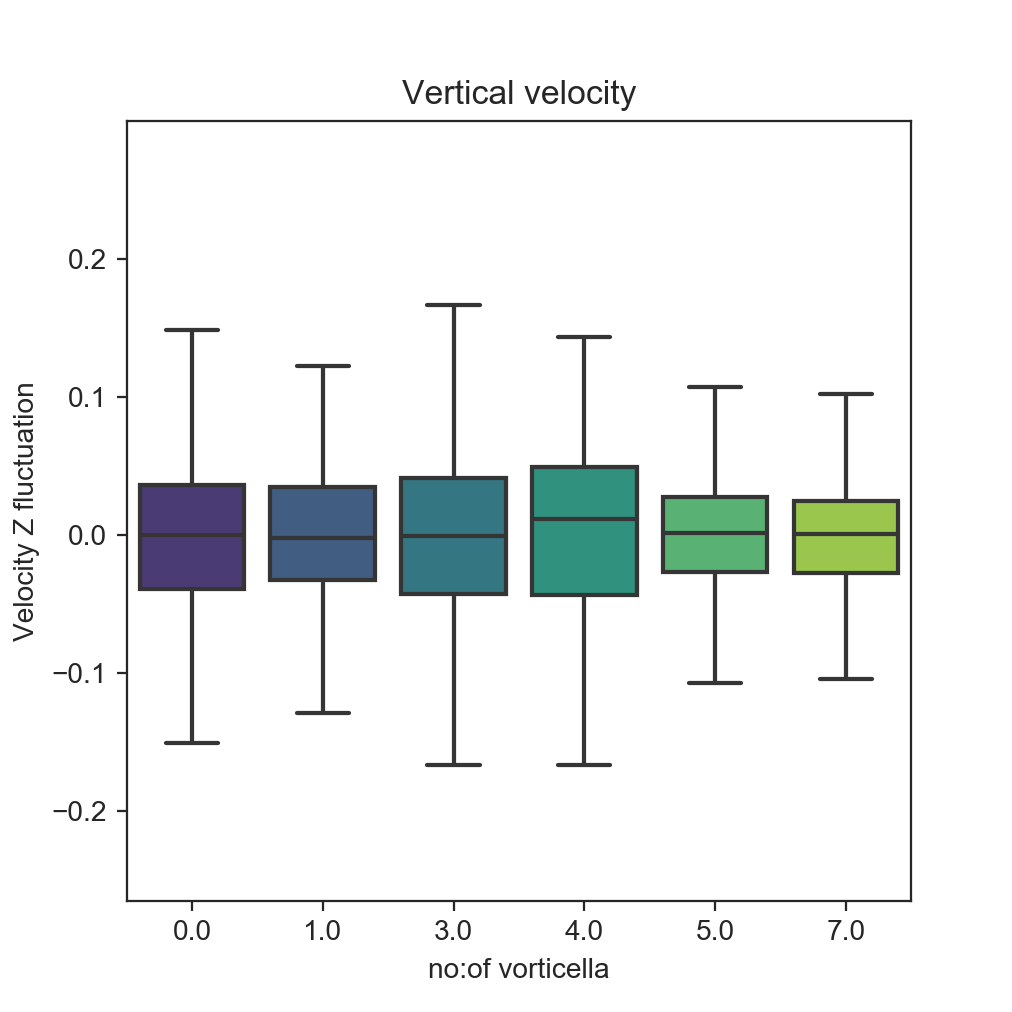

In [50]:
# Velocity full distribution
# Angular speed vs no:of vorticella (Box-plot)
title = 'Horizontal velocity'
plt.figure()
ax = sns.boxplot(x="no:of vorticella", y="Velocity X fluctuation", data=df, palette="viridis",fliersize=0)
plt.title(title)
plt.show()

title = 'Vertical velocity'
plt.figure()
ax = sns.boxplot(x="no:of vorticella", y="Velocity Z fluctuation", data=df, palette="viridis",fliersize=0)
plt.title(title)
plt.show()


<IPython.core.display.Javascript object>


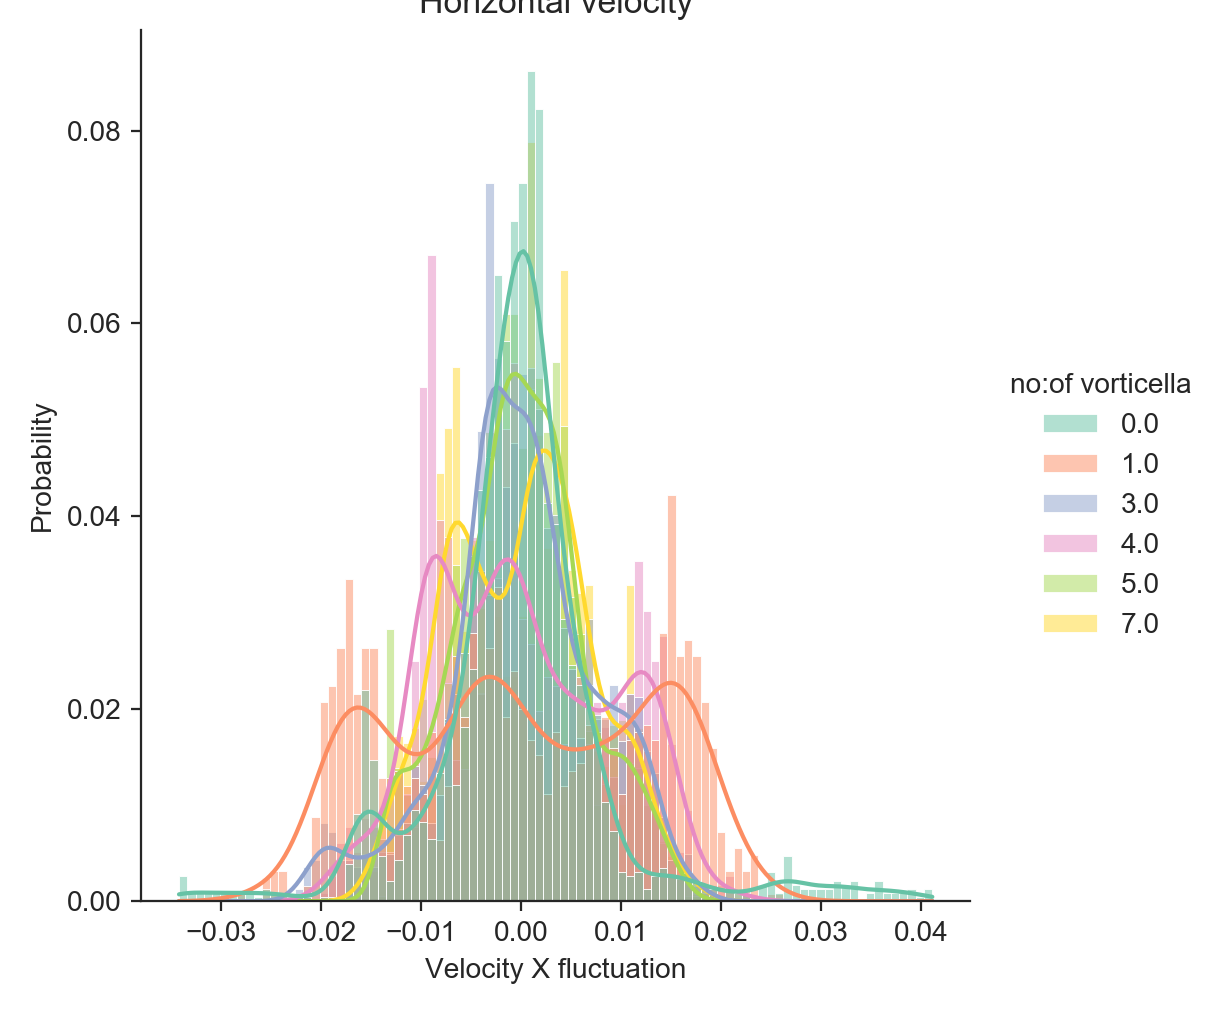

<IPython.core.display.Javascript object>


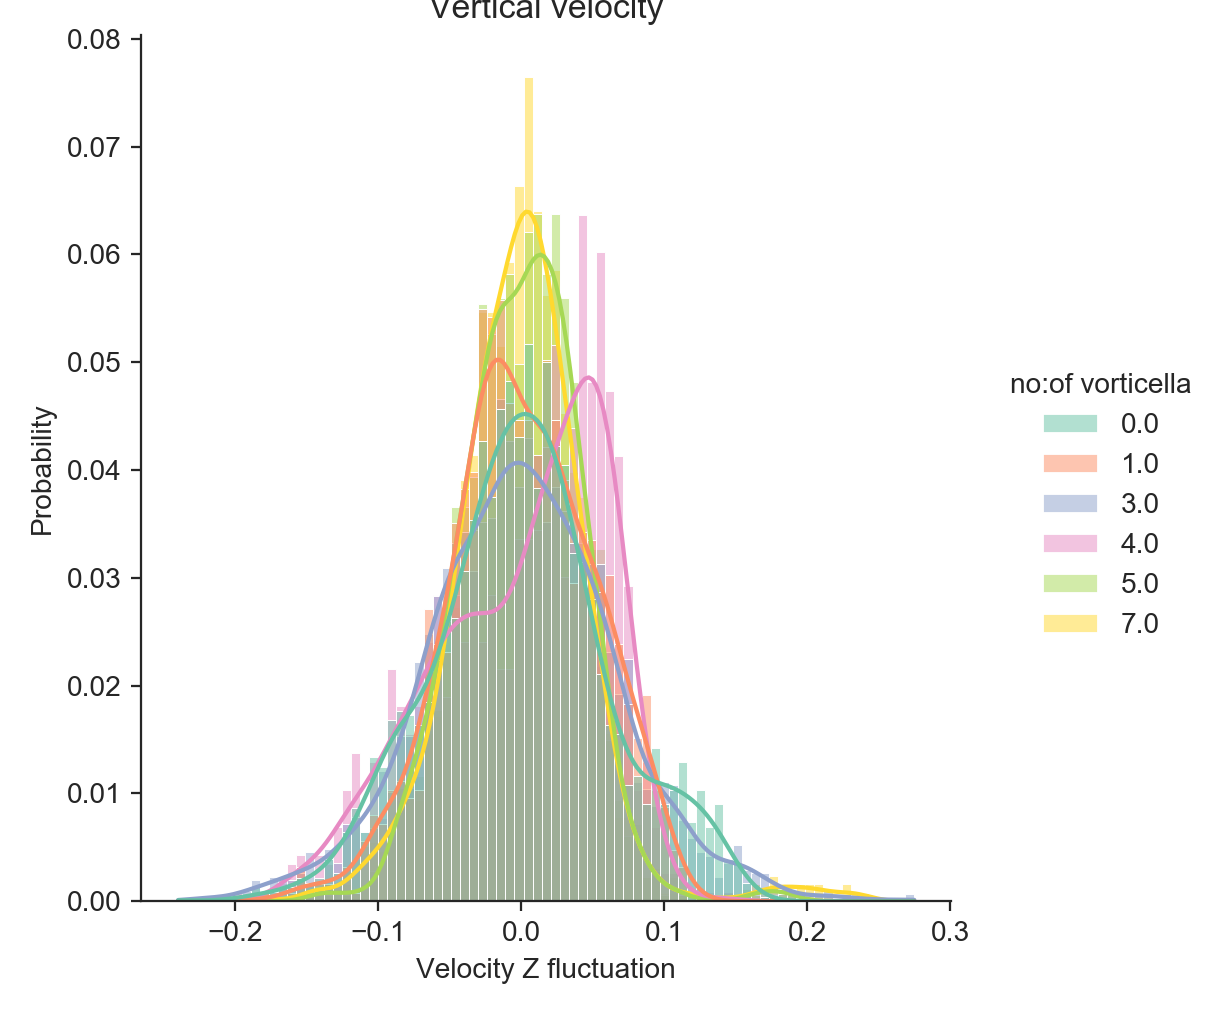

In [43]:
# Histogram plots
title = 'Horizontal velocity'
sns.displot(df, x="Velocity X fluctuation", hue = "no:of vorticella", common_norm=False, stat="probability", kde=True, palette="Set2")
plt.title(title)
plt.show()

title = 'Vertical velocity'
sns.displot(df, x="Velocity Z fluctuation", hue = "no:of vorticella", common_norm=False, stat="probability", kde=True, palette="Set2")
plt.title(title)
plt.show()

# Grouping data by particle size

<IPython.core.display.Javascript object>


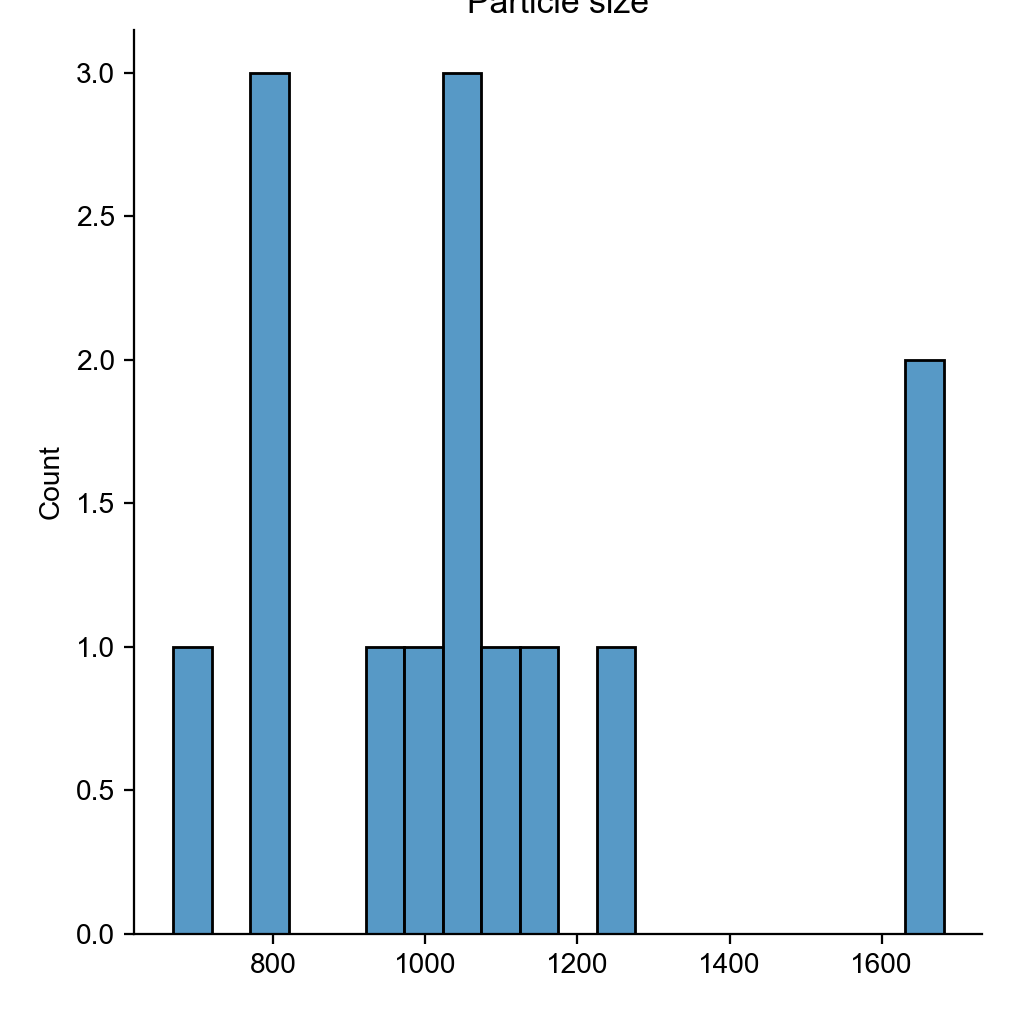

In [18]:
# Particle size histogram

particle_sizes = np.unique(df["object diameter (um)"])

title = 'Particle size'
sns.displot(x= particle_sizes, bins = 20, stat="count", kde=False, palette="Set2")
plt.title(title)
plt.show()


In [19]:
# Choose the size window between 900um and 1200 um

df_900_1250 = df.loc[(df['object diameter (um)'] >= 900) & (df['object diameter (um)'] <= 1250)]
df_900_1250

mean_particle_size = np.mean(df['object diameter (um)'])
print(mean_particle_size)

# 

1051.4229660908743


# Estimate of velocity fluctuations from known Vorticella parameters

In [20]:
F_vorticella = 200e-12 # Point force due to Vorticella
a = 0.5*1e-6*np.mean(df['object diameter (um)'])
print("mean aggregate radius: {} mm".format(a))
mu_water = 0.001 # Viscosity of water in Pa.s
# \Omega = F/(8\pi \mu a^2)
U = F_vorticella/(6*np.pi*mu_water*a)

print("Predicted scale of velocity fluctuations {} um/s".format(U*1e6))

mean aggregate radius: 0.0005257114830454371 mm
Predicted scale of velocity fluctuations 20.18279965656113 um/s


<IPython.core.display.Javascript object>


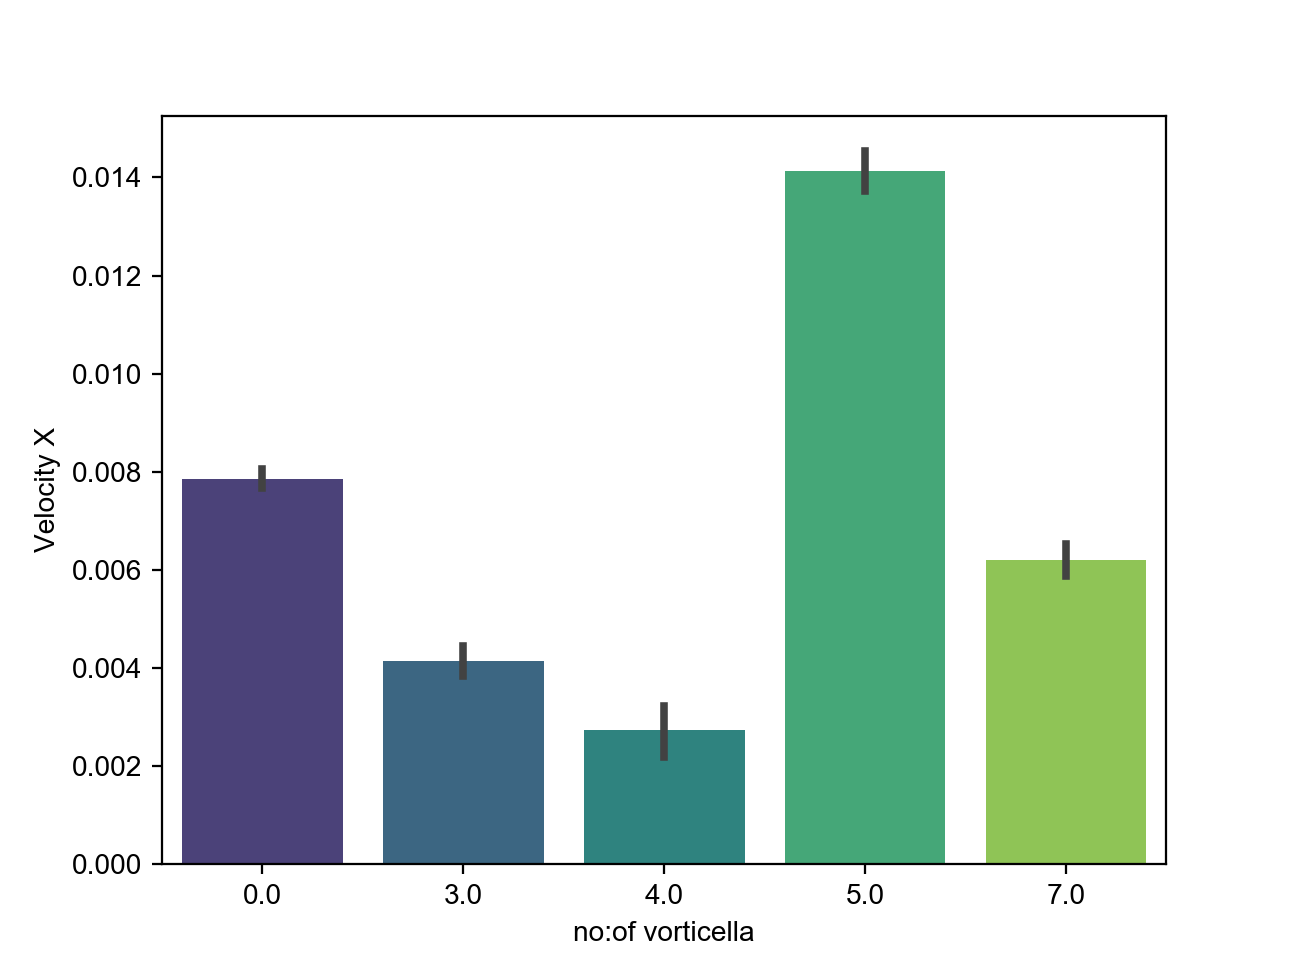

<IPython.core.display.Javascript object>


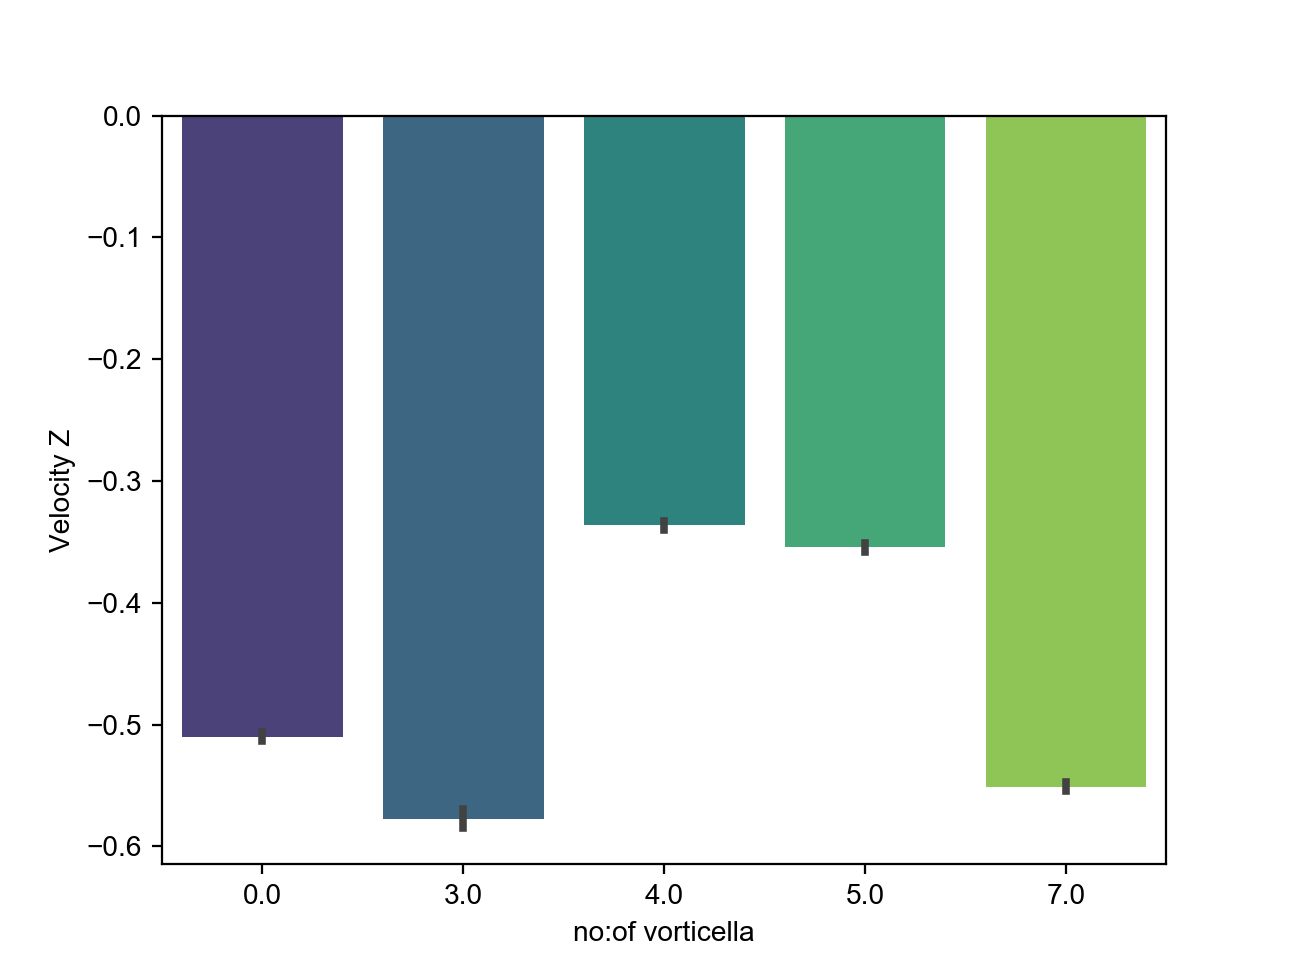

In [21]:
# Variations in the mean
plt.figure()
ax1 = sns.barplot(x="no:of vorticella", y="Velocity X", data=df_900_1250, palette="viridis")

plt.figure()
ax1 = sns.barplot(x="no:of vorticella", y="Velocity Z", data=df_900_1250, palette="viridis")

<IPython.core.display.Javascript object>


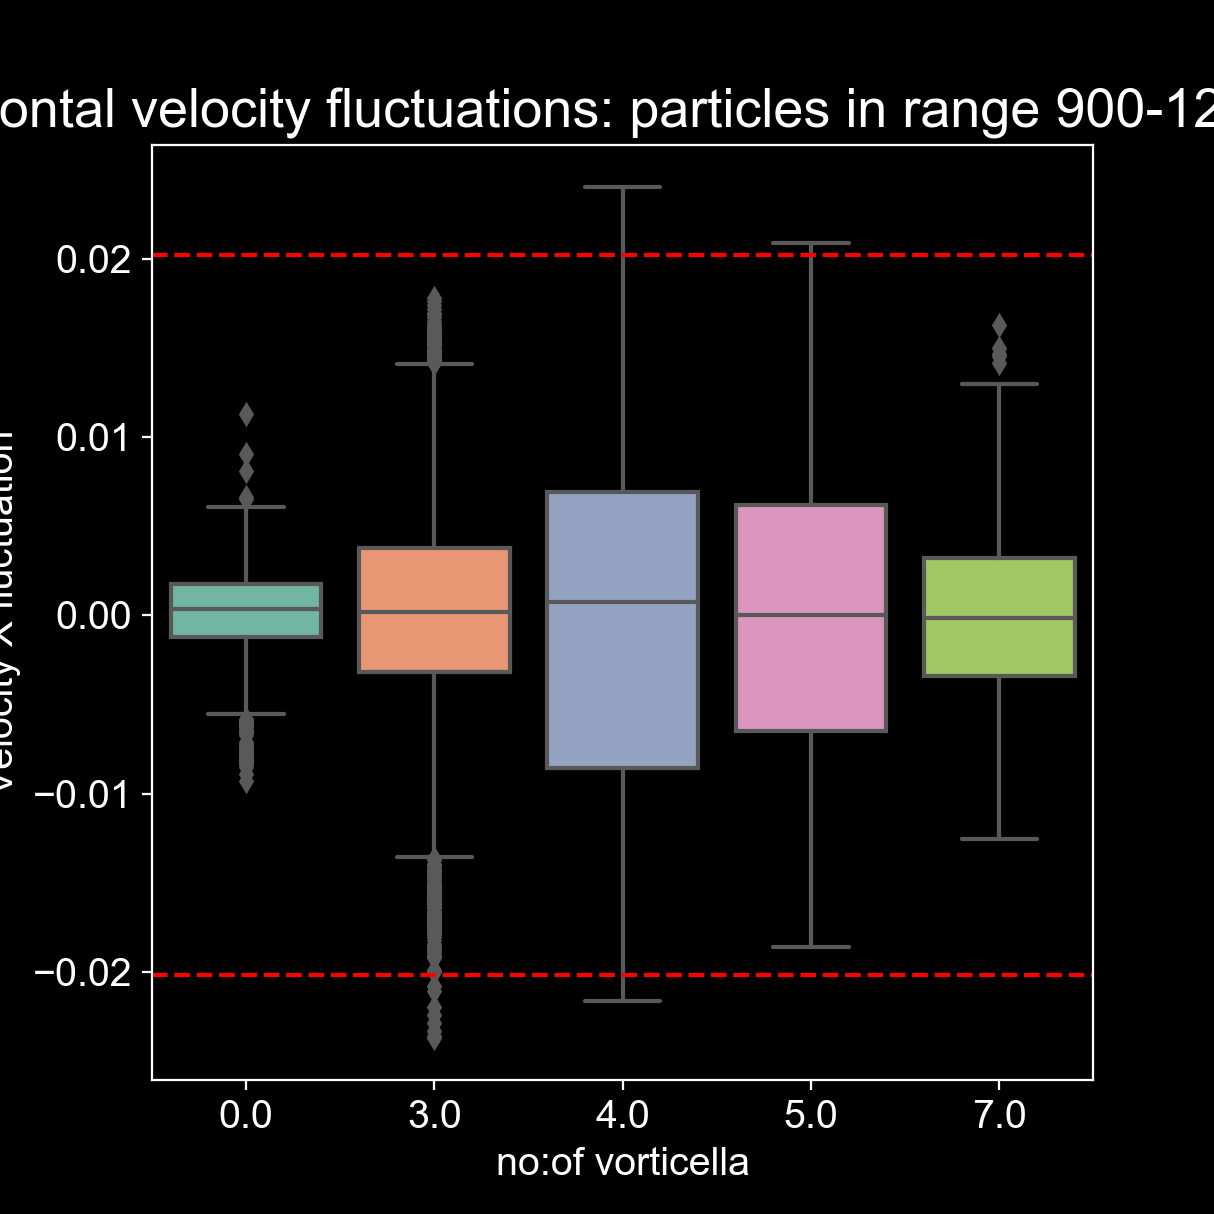

<IPython.core.display.Javascript object>


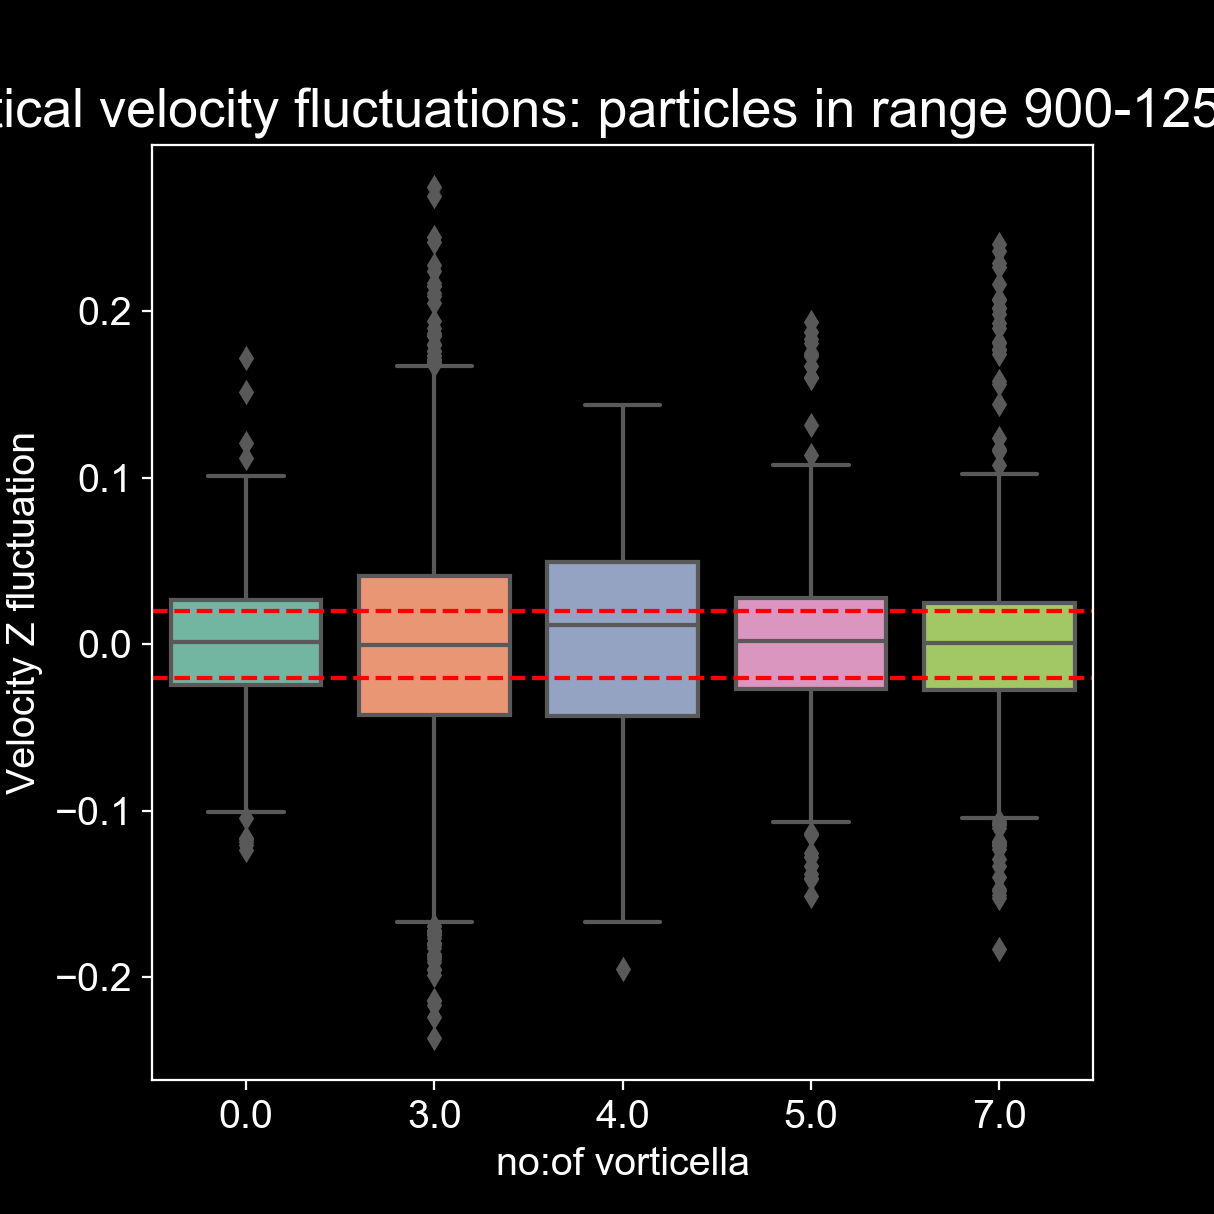

In [32]:
# Velocity distribution
# Angular speed vs no:of vorticella (Box-plot)
plt.style.use('dark_background')

particle_size = 'particles in range 900-1250 um'
title = 'Horizontal velocity fluctuations'+ ': ' + particle_size
plt.figure(figsize=(6,6))
ax = sns.boxplot(x="no:of vorticella", y="Velocity X fluctuation", data=df_900_1250, palette="Set2")
ax.axhline(1e3*U, ls='--', color = 'r')
ax.axhline(-1e3*U, ls='--', color = 'r')

plt.title(title)
plt.savefig(os.path.join(plots_folder, 'HorizontalVelocity_boxplot' + '.png'))
plt.savefig(os.path.join(plots_folder, 'HorizontalVelocity_boxplot' + '.svg'))

plt.show()

title = 'Vertical velocity fluctuations'+ ': ' + particle_size
plt.figure(figsize=(6,6))
ax = sns.boxplot(x="no:of vorticella", y="Velocity Z fluctuation", data=df_900_1250, palette="Set2")
ax.axhline(1e3*U, ls='--', color = 'r')
ax.axhline(-1e3*U, ls='--', color = 'r')
plt.savefig(os.path.join(plots_folder, 'VerticalVelocity_boxplot' + '.png'))
plt.savefig(os.path.join(plots_folder, 'VerticalVelocity_boxplot' + '.svg'))
plt.title(title)
plt.show()

<IPython.core.display.Javascript object>


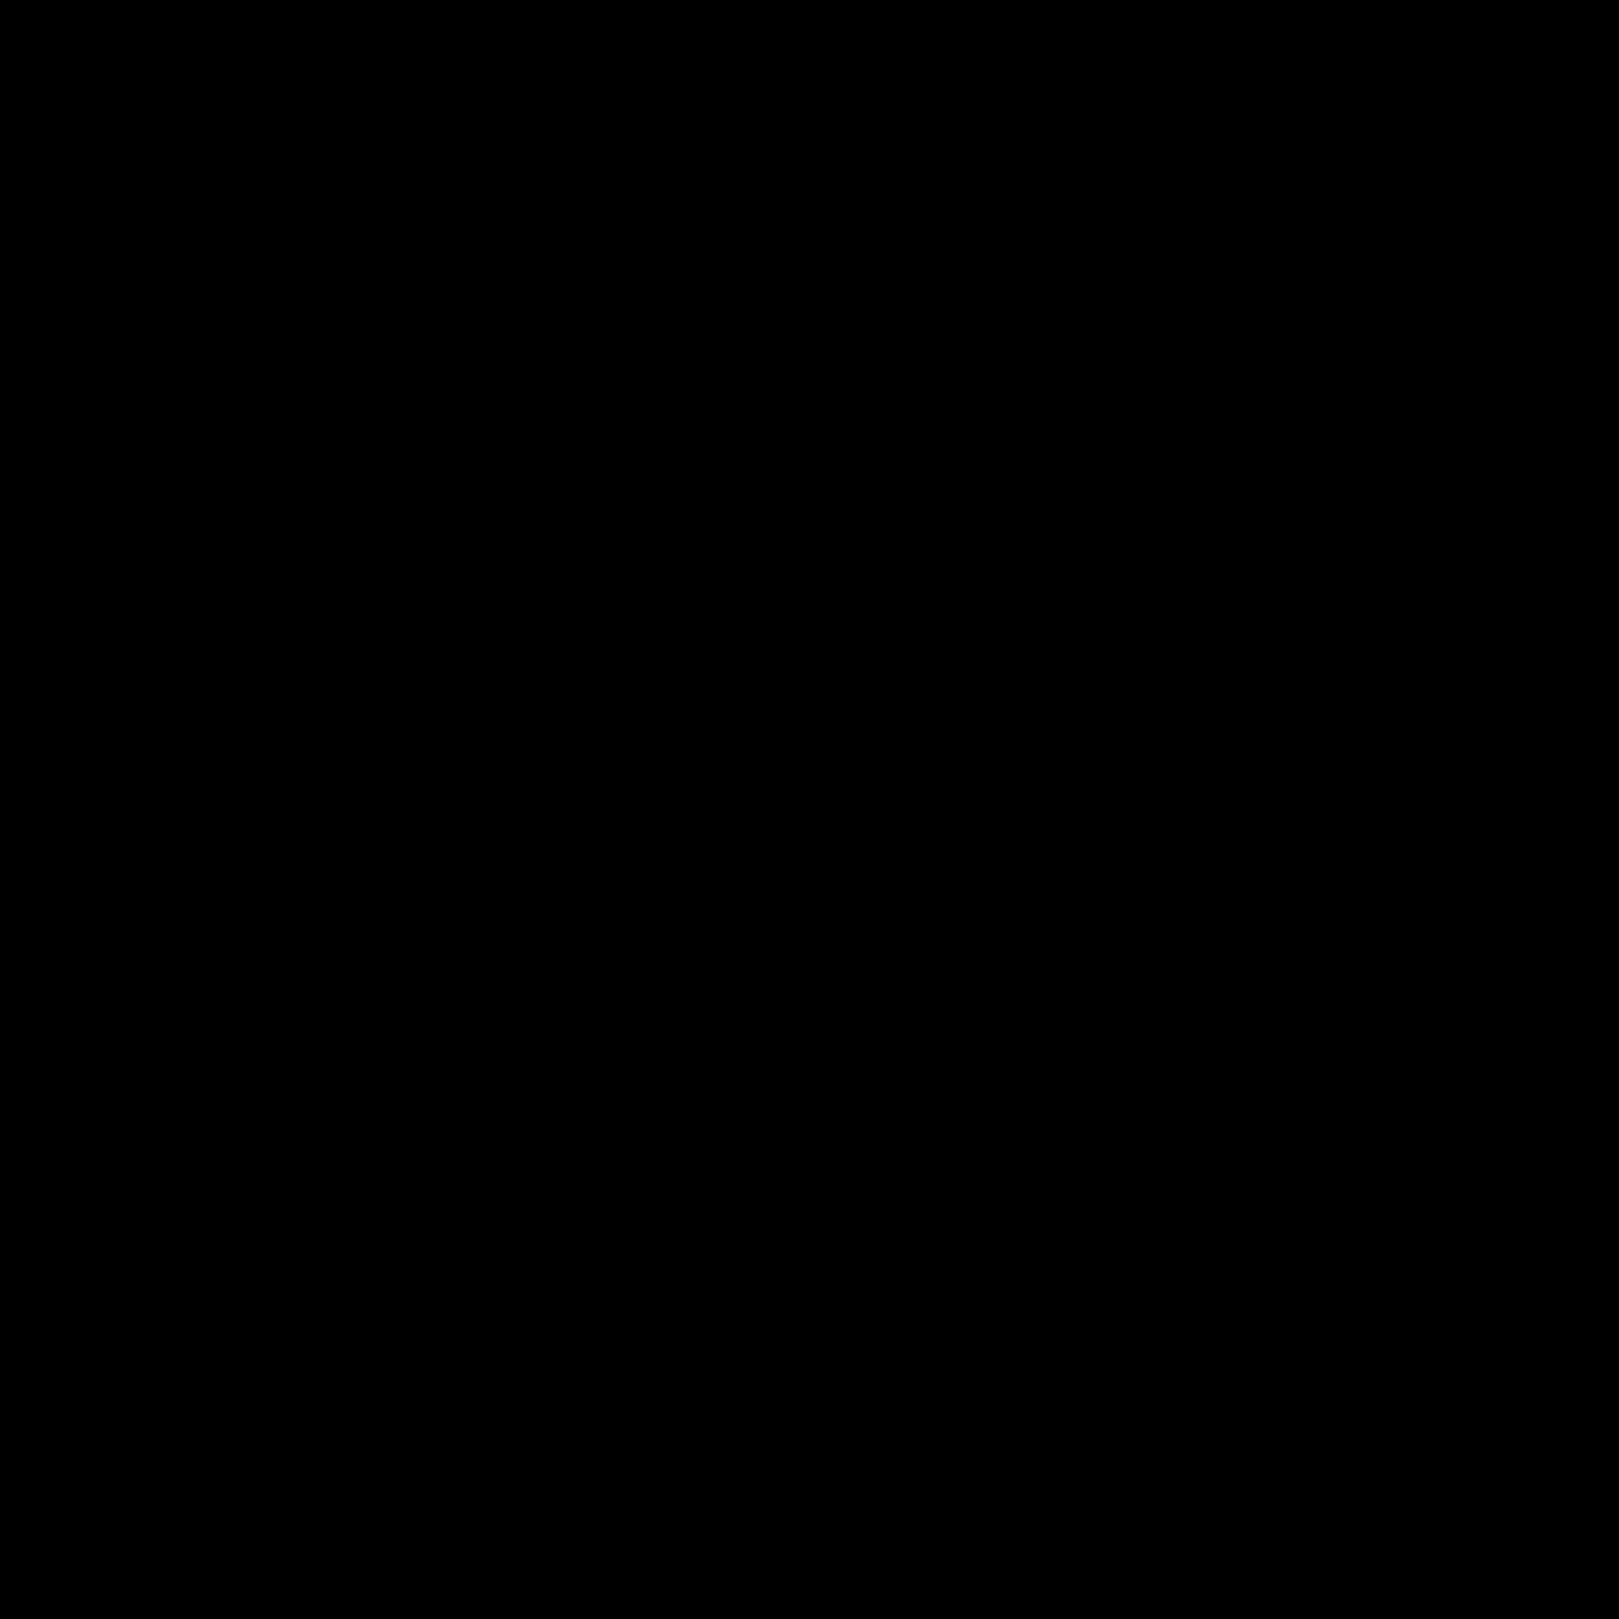

<IPython.core.display.Javascript object>


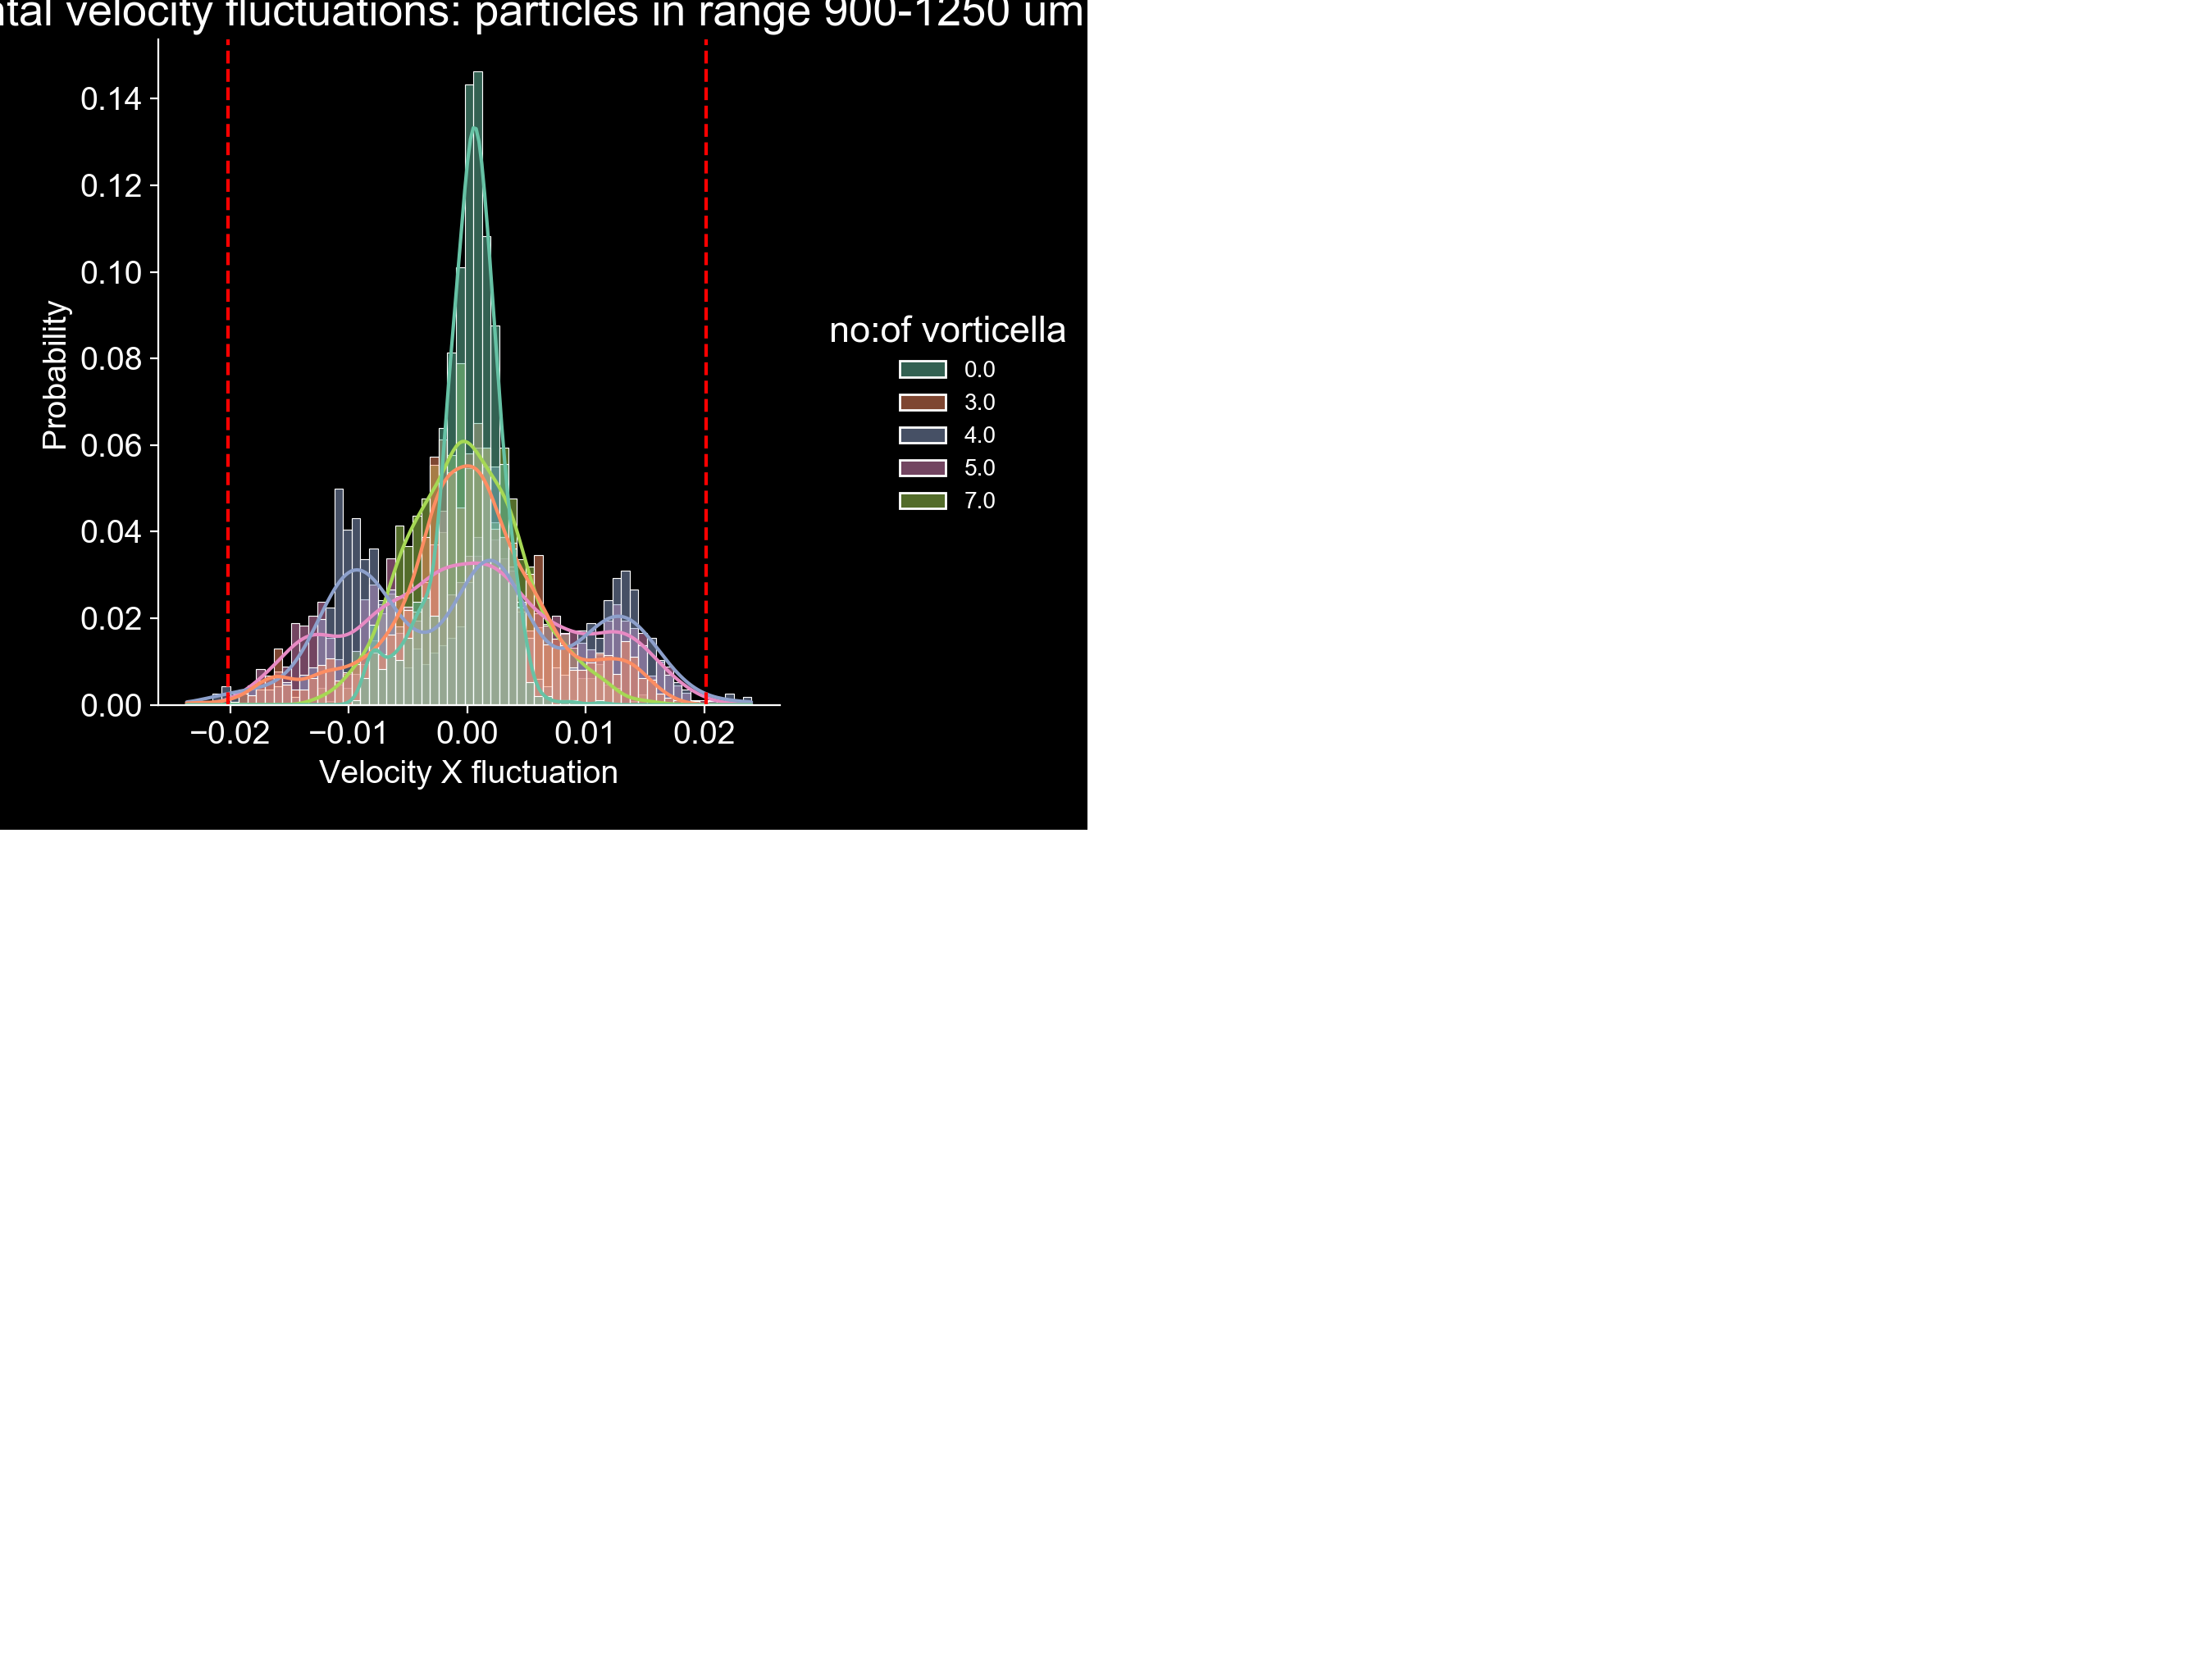

<IPython.core.display.Javascript object>


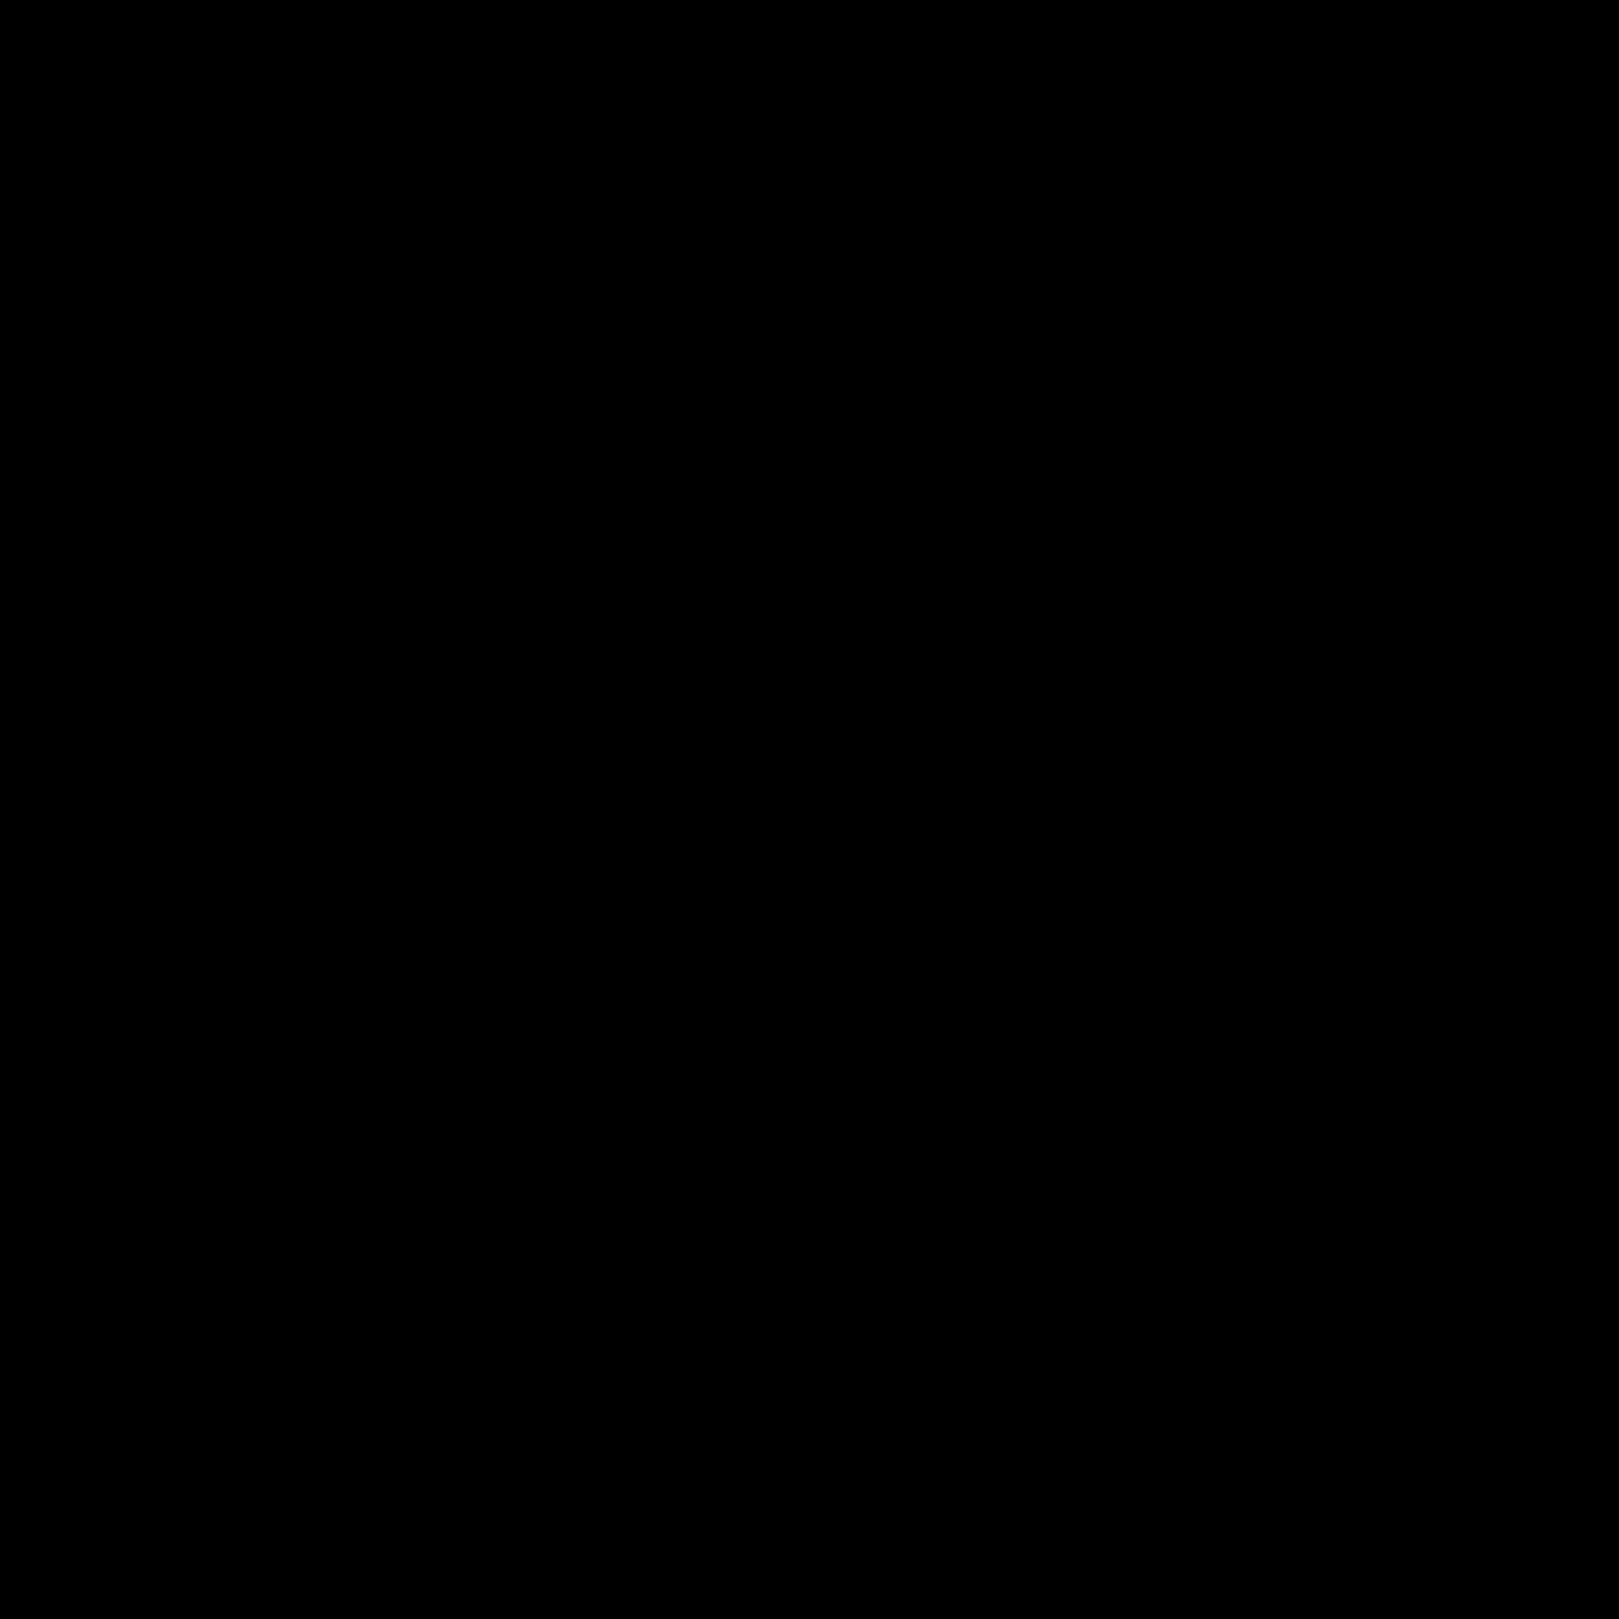

<IPython.core.display.Javascript object>


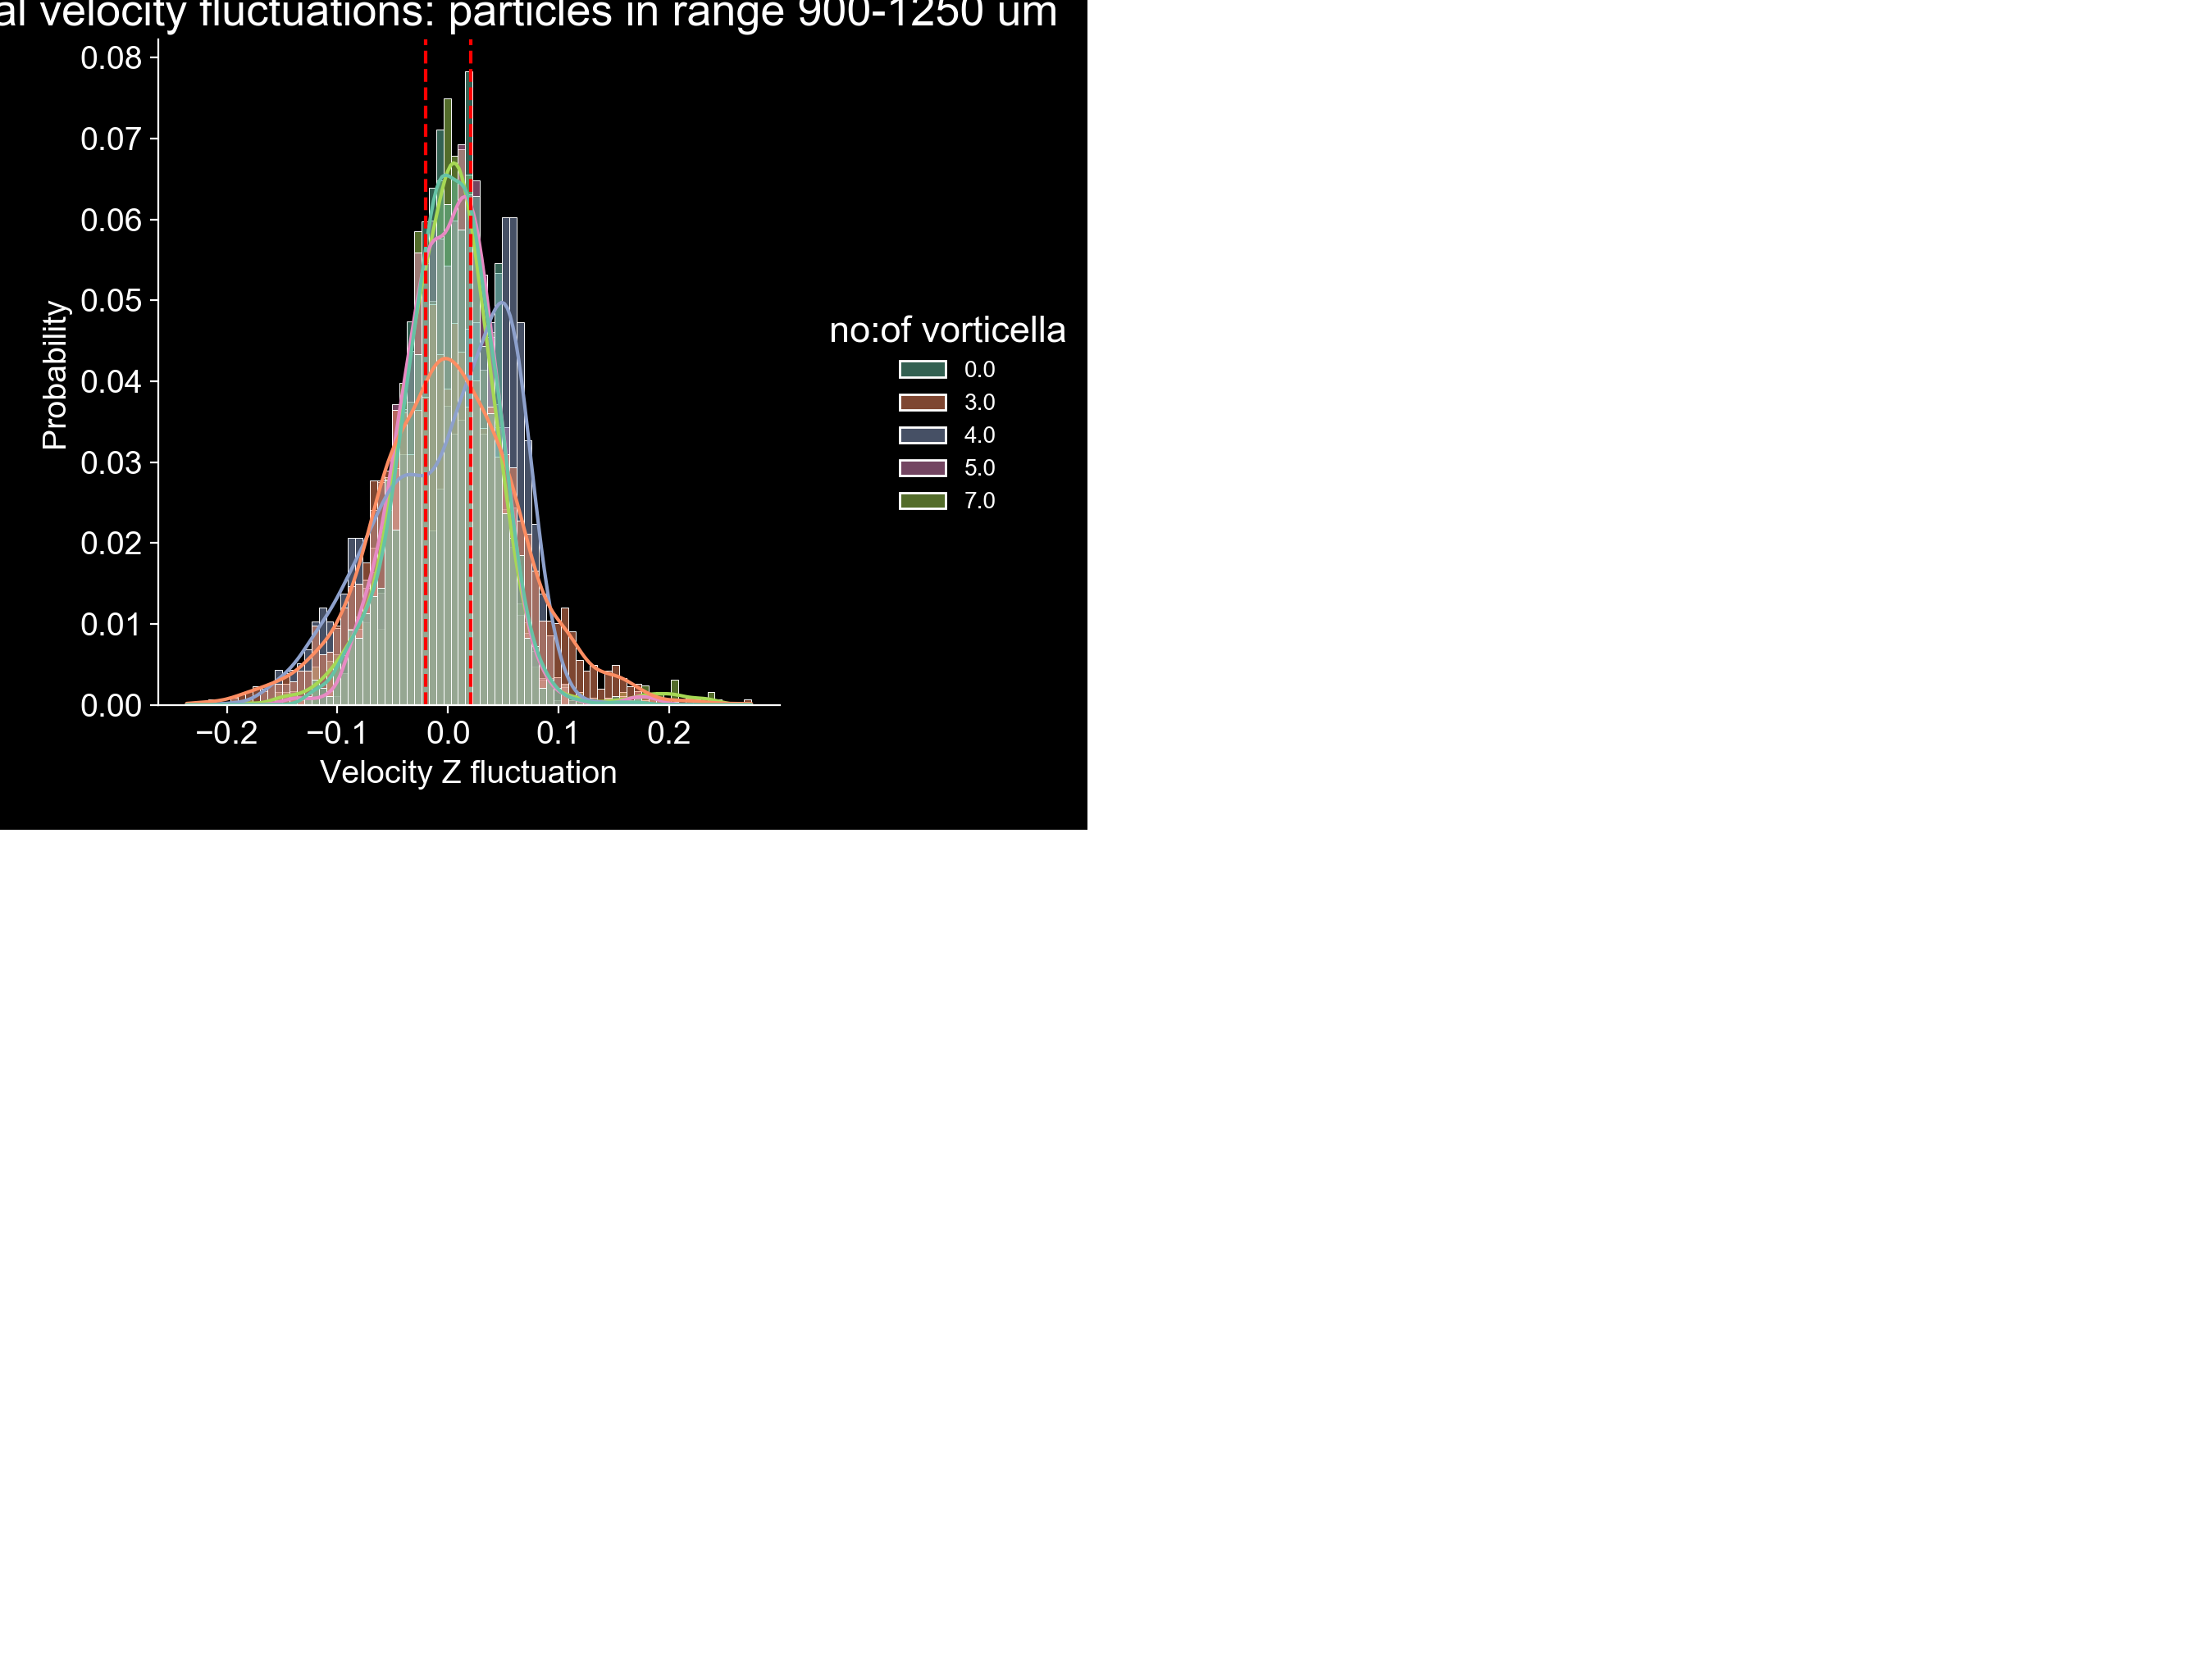

In [31]:
# Histogram plots
plt.style.use('dark_background')

title = 'Horizontal velocity fluctuations'+': ' + particle_size
plt.figure(figsize = (8,8))
sns.displot(df_900_1250, x="Velocity X fluctuation", hue = "no:of vorticella", common_norm=False, stat="probability", kde=True, palette="Set2")
ax = plt.gca()
ax.axvline(1e3*U, ls='--', color = 'r')
ax.axvline(-1e3*U, ls='--', color = 'r')
plt.title(title)
plt.savefig(os.path.join(plots_folder, 'HorizontalVelocityDist' + '.png'))
plt.savefig(os.path.join(plots_folder, 'HorizontalVelocityDist' + '.svg'))

plt.show()

title = 'Vertical velocity fluctuations'+': ' + particle_size
plt.figure(figsize = (8,8))
sns.displot(df_900_1250, x="Velocity Z fluctuation", hue = "no:of vorticella", common_norm=False, stat="probability", kde=True, palette="Set2")
ax = plt.gca()
ax.axvline(1e3*U, ls='--', color = 'r')
ax.axvline(-1e3*U, ls='--', color = 'r')
plt.title(title)
plt.savefig(os.path.join(plots_folder, 'VerticalVelocityDist' + '.png'))
plt.savefig(os.path.join(plots_folder, 'VerticalVelocityDist' + '.svg'))

plt.show()

In [107]:
# Plot the standard deviation in the velocity as a function of vorticella number
from scipy.stats import norm, kurtosis

n_vorticella_list = np.unique(df_900_1250['no:of vorticella'])
print(n_vorticella_list)

[0. 3. 4. 5. 7.]


In [120]:
stdev_velocity_X = np.zeros(len(n_vorticella_list))
stdev_velocity_Z = np.zeros(len(n_vorticella_list))
kurtosis_velocity_X = np.zeros(len(n_vorticella_list))
kurtosis_velocity_Z = np.zeros(len(n_vorticella_list))

for ii, n in enumerate(n_vorticella_list):
    
    velocity_X = df_900_1250['Velocity X fluctuation'].loc[df_900_1250['no:of vorticella'] == n]
    velocity_Z = df_900_1250['Velocity Z fluctuation'].loc[df_900_1250['no:of vorticella'] == n]
    
    stdev_velocity_X[ii] = np.nanstd(velocity_X)
    stdev_velocity_Z[ii] = np.nanstd(velocity_Z)
    
    kurtosis_velocity_X[ii] = kurtosis(velocity_X, nan_policy='omit', fisher = False)
    kurtosis_velocity_Z[ii] = kurtosis(velocity_Z, nan_policy='omit', fisher = False)
    

<IPython.core.display.Javascript object>


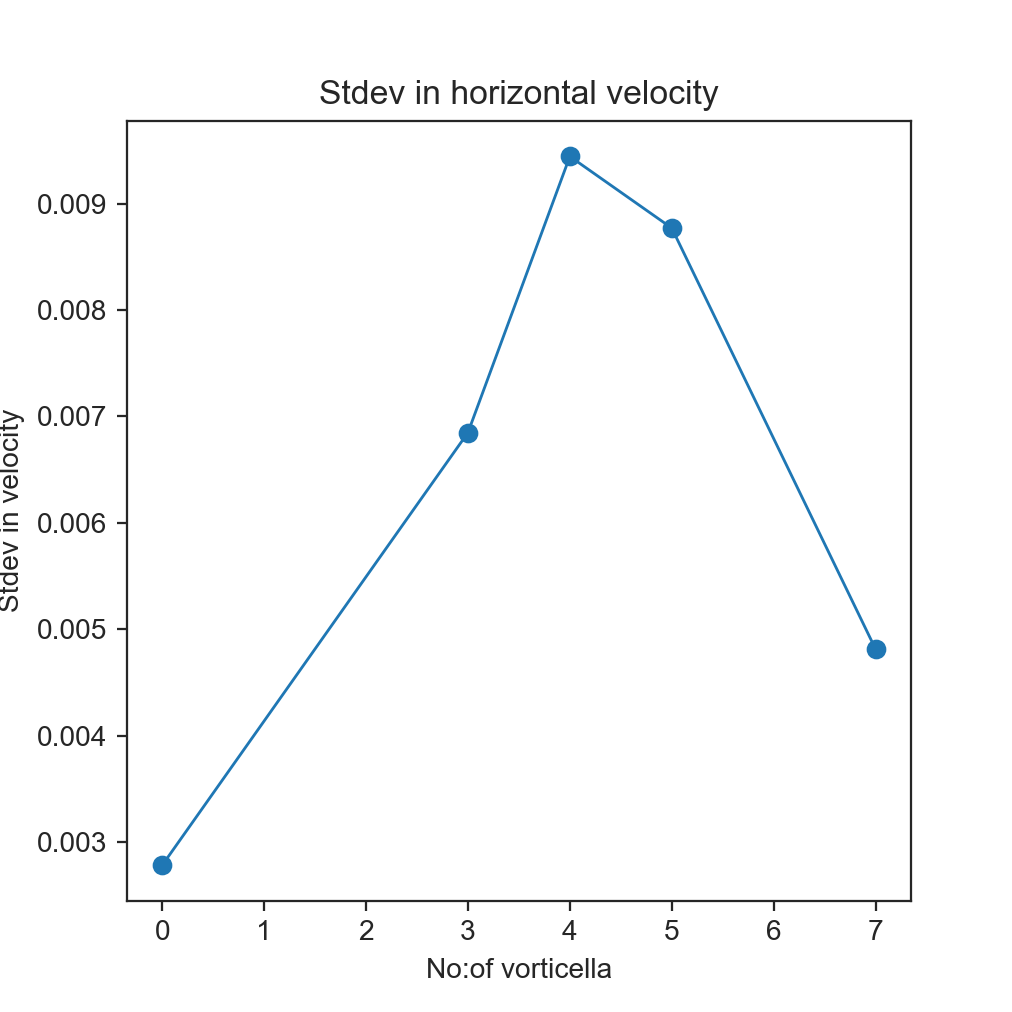

<IPython.core.display.Javascript object>


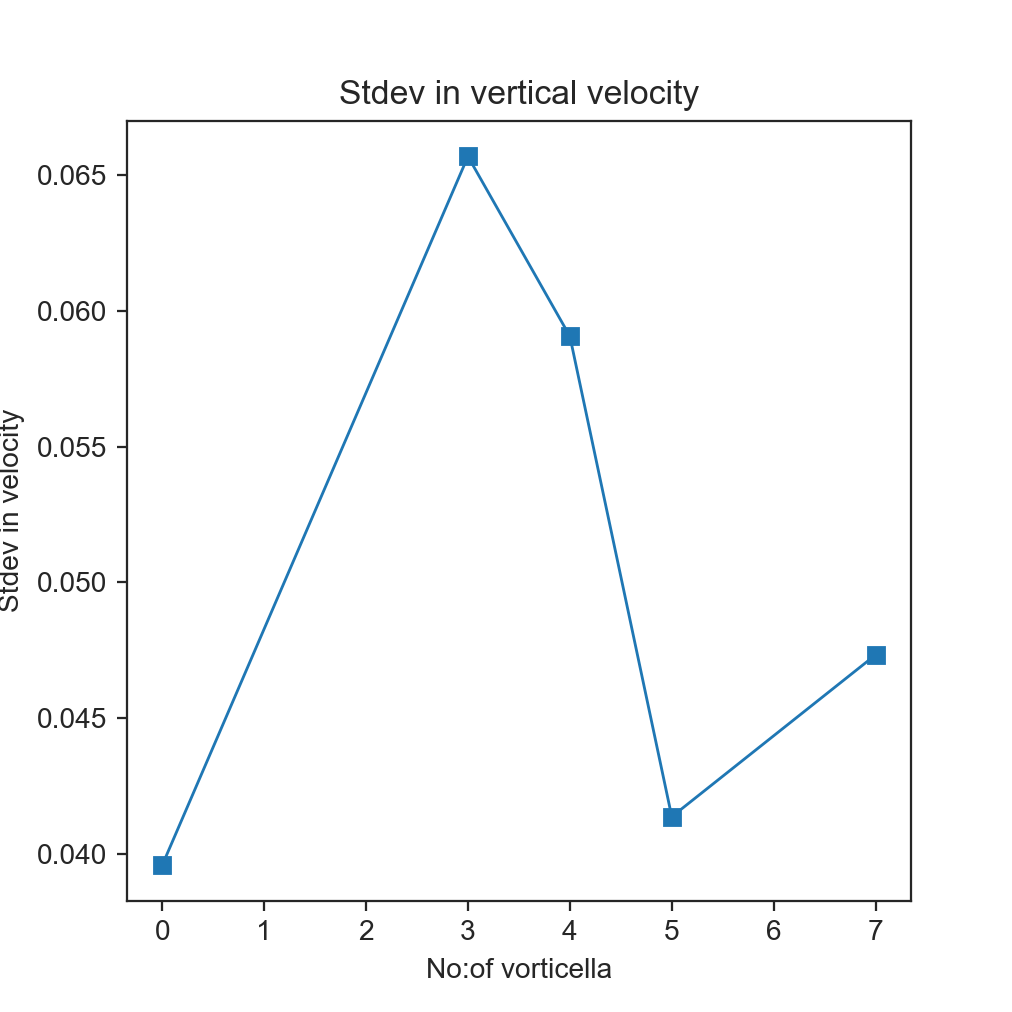

<IPython.core.display.Javascript object>


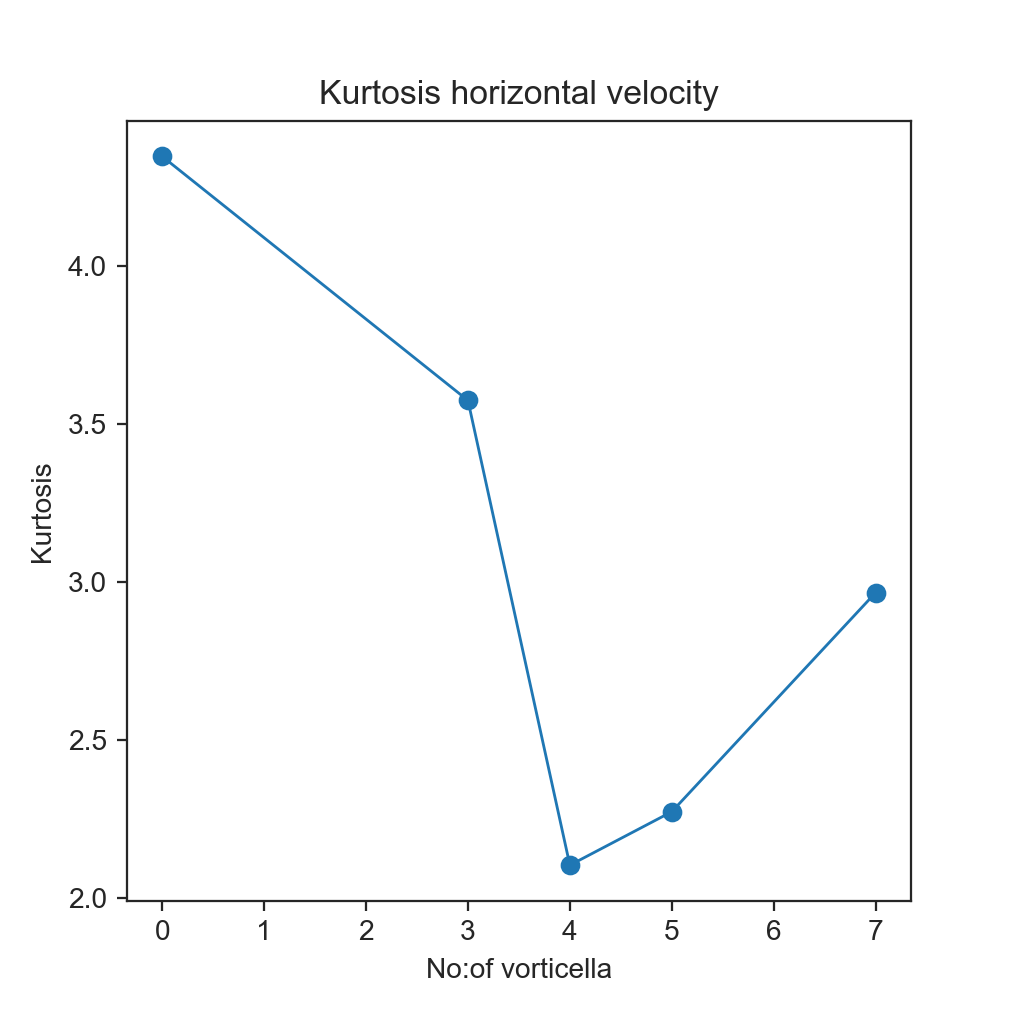

<IPython.core.display.Javascript object>


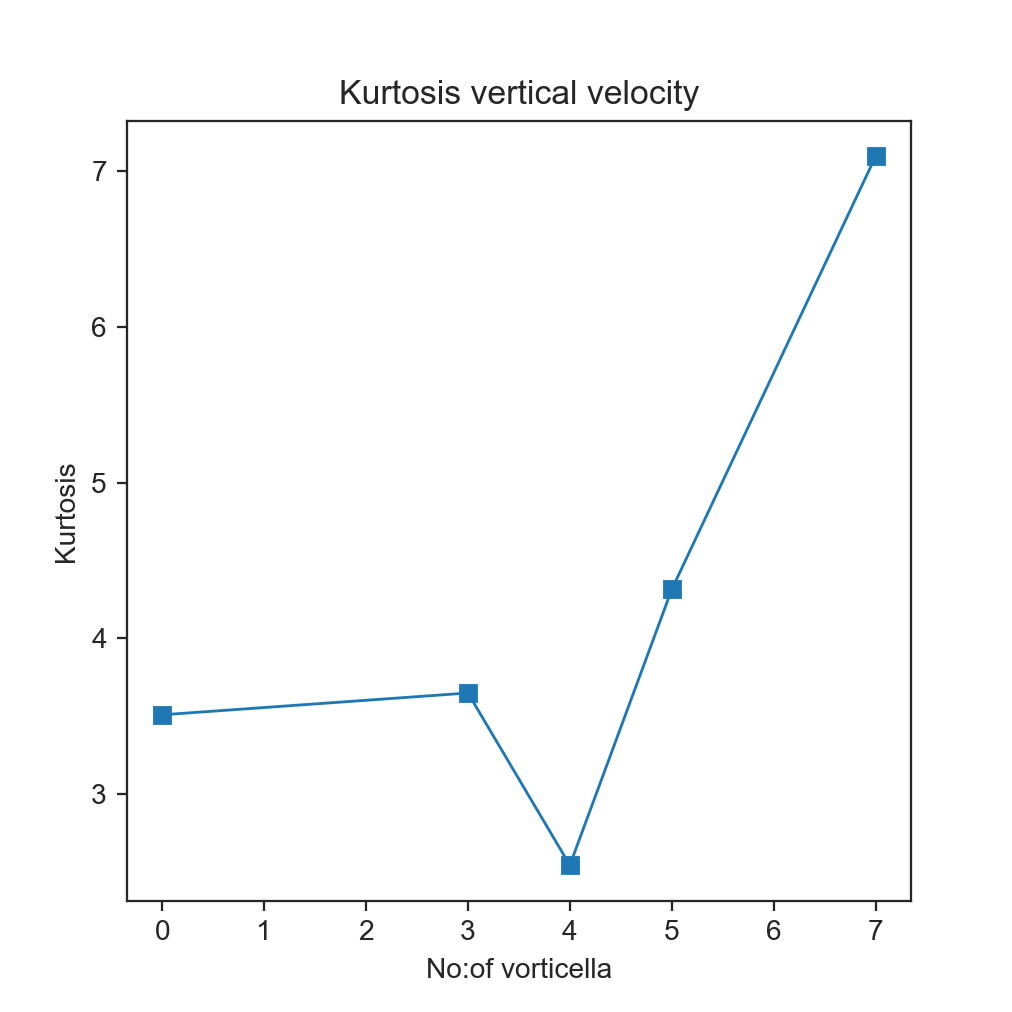

In [121]:
# Plot standard deviation in velocity vs no:of vorticella

title = 'Stdev in horizontal velocity'
plt.figure()
plt.plot(n_vorticella_list, stdev_velocity_X, marker = 'o', linewidth = 1)
plt.xlabel('No:of vorticella')
plt.ylabel('Stdev in velocity')
plt.title(title)
plt.show()

title = 'Stdev in vertical velocity'
plt.figure()
plt.plot(n_vorticella_list, stdev_velocity_Z, marker = 's', linewidth = 1)
plt.xlabel('No:of vorticella')
plt.ylabel('Stdev in velocity')
plt.title(title)
plt.show()

title = 'Kurtosis horizontal velocity'
plt.figure()
plt.plot(n_vorticella_list, kurtosis_velocity_X, marker = 'o', linewidth = 1)
plt.xlabel('No:of vorticella')
plt.ylabel('Kurtosis')
plt.title(title)
plt.show()

title = 'Kurtosis vertical velocity'
plt.figure()
plt.plot(n_vorticella_list, kurtosis_velocity_Z, marker = 's', linewidth = 1)
plt.xlabel('No:of vorticella')
plt.ylabel('Kurtosis')
plt.title(title)
plt.show()

In [114]:
kurtosis_velocity_Z

array([nan, nan, nan, nan, nan])

# Tracks/Aggregates per condition

In [3]:
n_vorticella = np.unique(df['no:of vorticella'])
print(n_vorticella)

[0. 1. 3. 4. 5. 7.]


In [16]:
# Find number of distinct tracks/spheres per condition
distinct_tracks = np.zeros(len(n_vorticella))
distinct_spheres = np.zeros(len(n_vorticella))
total_track_durations = np.zeros(len(n_vorticella))

for ii, n in enumerate(n_vorticella):
    
    df_temp = df.loc[df['no:of vorticella'] == n]
    distinct_tracks[ii] = len(np.unique(df_temp['track file']))
    distinct_spheres[ii] = len(np.unique(df_temp['track ID']))
    
    tracks_per_condition = np.unique(df_temp['track file'])
    
    
    for track in tracks_per_condition:
        print(track)
        df_track = df_temp.loc[df_temp['track file'] == track]
        
        time_array = np.array(df_track['Time'])
   
        
        track_duration = time_array[-1] - time_array[0]
        print(track_duration)
        
        total_track_durations[ii]+=track_duration
    
df_tracks_spheres = pd.DataFrame({'no:of vorticella':n_vorticella, 'No:of distinct tracks':distinct_tracks, 'No:of distinct spheres':distinct_spheres, 'Total duration (s)':total_track_durations})
df_tracks_spheres.to_csv(os.path.join(plots_folder, 'Tracks_Spheres_Duration-per_condition.csv'))

df_tracks_spheres

D:/Vorticella_GravityMachine/2019_08_23/track8/track000.csv
187.06
D:/Vorticella_GravityMachine/2019_08_23/track9/track000.csv
103.03
H:/2019 Monterey Trip/Vorticella_GM/2019_08_22/Track3/track000.csv
174.98000000000002
H:/2019 Monterey Trip/Vorticella_GM/2019_08_22_afterdinner/track1/track000.csv
42.48
H:/2019 Monterey Trip/Vorticella_GM/2019_08_22_afterdinner/track2/track000.csv
147.92
H:/2019 Monterey Trip/Vorticella_GM/2019_08_22_afterdinner/track6/track000.csv
208.75
H:/2019 Monterey Trip/Vorticella_GM/2019_08_22_afterdinner/track7/track000.csv
221.3
H:/2019 Monterey Trip/Vorticella_GM/2019_08_21_Afternoon/Track10/track000.csv
275.09999999999997
H:/2019 Monterey Trip/Vorticella_GM/2019_08_21_Afternoon/Track11/track000.csv
59.53
H:/2019 Monterey Trip/Vorticella_GM/2019_08_21_Afternoon/Track8/track000.csv
84.28
H:/2019 Monterey Trip/Vorticella_GM/2019_08_22/Track5/track000.csv
942.26
H:/2019 Monterey Trip/Vorticella_GM/2019_08_22/track8/track000.csv
37.78
H:/2019 Monterey Trip/Vorti

,no:of vorticella,No:of distinct tracks,No:of distinct spheres,Total duration (s)
0,0.0,7.0,6.0,1085.52
1,1.0,3.0,2.0,418.91
2,3.0,3.0,1.0,1168.90
3,4.0,1.0,1.0,450.47
4,5.0,1.0,1.0,811.61
5,7.0,1.0,1.0,404.83
